In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/MW.txt'

df = pd.read_csv(path,delimiter='\t', header=None)

In [ ]:
display(df)

,0,1,2,3,4,5,6
0,0,0,MW,FP1,0,1017,"38,48,51,44,48,56,56,41,20,-3,-9,-1,6,5,6,17,2..."
1,1,1,MW,FP1,1,889,"83,74,65,65,66,55,43,25,18,20,26,33,41,38,28,3..."
2,2,2,MW,FP1,4,1017,"19,10,-2,-9,-5,3,8,7,8,2,-10,-21,-22,-27,-30,-..."
3,3,3,MW,FP1,1,1017,"17,29,36,26,21,17,17,13,17,21,25,26,20,5,-5,-1..."
4,4,4,MW,FP1,8,952,"77,74,69,70,76,75,76,75,67,66,76,93,98,82,55,3..."
...,...,...,...,...,...,...,...
67630,67630,67630,MW,FP1,-1,1024,"138,135,123,96,59,38,11,16,44,67,70,73,67,33,4..."
67631,67631,67631,MW,FP1,-1,1024,"4,5,-7,-12,-11,-17,2,52,73,55,12,-22,-7,38,43,..."
67632,67632,67632,MW,FP1,-1,1024,"96,163,208,179,129,114,140,155,108,56,28,9,-8,..."
67633,67633,67633,MW,FP1,-1,1024,"-30,4,53,85,84,72,80,85,65,23,-26,-42,-56,-146..."


In [ ]:
df = df[df.iloc[:, 4] != -1]


In [ ]:
display(df)

,0,1,2,3,4,5,6
0,0,0,MW,FP1,0,1017,"38,48,51,44,48,56,56,41,20,-3,-9,-1,6,5,6,17,2..."
1,1,1,MW,FP1,1,889,"83,74,65,65,66,55,43,25,18,20,26,33,41,38,28,3..."
2,2,2,MW,FP1,4,1017,"19,10,-2,-9,-5,3,8,7,8,2,-10,-21,-22,-27,-30,-..."
3,3,3,MW,FP1,1,1017,"17,29,36,26,21,17,17,13,17,21,25,26,20,5,-5,-1..."
4,4,4,MW,FP1,8,952,"77,74,69,70,76,75,76,75,67,66,76,93,98,82,55,3..."
...,...,...,...,...,...,...,...
54929,54929,54929,MW,FP1,0,889,"37,21,26,35,41,52,59,59,54,51,43,45,49,48,36,1..."
54930,54930,54930,MW,FP1,9,1015,"18,20,19,32,41,45,52,53,65,86,103,96,81,75,72,..."
54931,54931,54931,MW,FP1,1,952,"52,55,71,73,59,53,50,51,56,64,65,56,39,33,52,6..."
54932,54932,54932,MW,FP1,6,1015,"26,42,59,68,59,38,13,6,17,35,49,54,44,36,36,27..."


In [ ]:
min_value = df.iloc[:, 5].min()
print(min_value)

441


In [ ]:
import numpy as np
import pandas as pd


y = df.iloc[:, 4]
X_str = df.iloc[:, 6]


X_str.replace('', np.nan, inplace=True)


X_df = pd.DataFrame(X_str.str.split(',').tolist())


X = X_df.iloc[:, :440].astype(float).values

print(X)


[[  38.   48.   51. ...  -60.  -53.  -55.]
 [  83.   74.   65. ... -189. -180. -169.]
 [  19.   10.   -2. ...   90.   67.   40.]
 ...
 [  52.   55.   71. ...   17.   32.   61.]
 [  26.   42.   59. ...   16.   24.   20.]
 [  51.   40.   34. ...   42.   32.   23.]]


In [ ]:
print(X.shape)

(54934, 440)


In [ ]:
from collections import defaultdict
digit_series = defaultdict(list)


for index, row in df.iterrows():

    values = list(map(int, row.iloc[6].split(',')))

    for digit in str(row.iloc[4]):
        digit_series[digit].append(values)

averages = {digit: [sum(x) / len(digit_series[digit]) for x in zip(*digit_series[digit])] for digit in digit_series}

averages_df = pd.DataFrame.from_dict(averages, orient='index')
averages_df.index.name = 'Digits'

averages_df = averages_df.sort_index()
print(averages_df)


              0          1          2          3          4          5    \
Digits                                                                     
0       32.958416  32.858615  32.897306  33.026577  32.973242  33.039053   
1       35.417061  35.579120  36.085304  36.476719  36.435795  36.413605   
2       35.027370  34.984231  35.033714  34.972449  34.804604  34.777778   
3       32.425591  32.251662  32.337888  32.319424  32.130539  32.328471   
4       34.909496  34.891470  34.892957  34.989035  35.003717  34.789630   
5       33.876257  33.898886  33.815194  33.832795  34.007902  34.300287   
6       32.709642  32.937546  33.210555  33.369248  33.271183  33.223521   
7       35.136527  35.207493  35.295569  35.285843  35.211095  35.020893   
8       34.274121  34.315780  34.480433  34.683679  34.714337  34.598738   
9       32.557798  32.547706  32.744220  32.884404  32.664220  32.367706   

              6          7          8          9    ...        878        879  \
Digits

In [ ]:
last_valid_col = None
for col in reversed(averages_df.columns):
    if averages_df[col].notna().all():
        last_valid_col = col
        break

print("Last column without any NaN values:", last_valid_col)


Last column without any NaN values: 440


In [ ]:
new_df = averages_df.iloc[:, :440]

print(new_df)

              0          1          2          3          4          5    \
Digits                                                                     
0       32.958416  32.858615  32.897306  33.026577  32.973242  33.039053   
1       35.417061  35.579120  36.085304  36.476719  36.435795  36.413605   
2       35.027370  34.984231  35.033714  34.972449  34.804604  34.777778   
3       32.425591  32.251662  32.337888  32.319424  32.130539  32.328471   
4       34.909496  34.891470  34.892957  34.989035  35.003717  34.789630   
5       33.876257  33.898886  33.815194  33.832795  34.007902  34.300287   
6       32.709642  32.937546  33.210555  33.369248  33.271183  33.223521   
7       35.136527  35.207493  35.295569  35.285843  35.211095  35.020893   
8       34.274121  34.315780  34.480433  34.683679  34.714337  34.598738   
9       32.557798  32.547706  32.744220  32.884404  32.664220  32.367706   

              6          7          8          9    ...        430        431  \
Digits

In [ ]:
import numpy as np
import tensorflow as tf

X = []
for row in X_str:
    values = [x for x in row.split(',') if x != '']
    X.append(np.array([float(x) for x in values]))

max_length = max(len(row) for row in X)
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_length, dtype='float32', padding='post')
X = np.expand_dims(X, axis=-1)

In [ ]:
display(new_df)

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
Digits,,,,,,,,,,,,,,,,,,,,,
0,32.958416,32.858615,32.897306,33.026577,32.973242,33.039053,33.324534,33.596999,33.772735,33.724101,...,35.628096,35.651419,35.633159,35.690110,35.736214,35.527029,35.257458,35.089857,34.937263,34.723739
1,35.417061,35.579120,36.085304,36.476719,36.435795,36.413605,36.355584,36.283194,36.376319,36.371226,...,35.095489,34.874136,34.632957,34.449800,34.417970,34.491451,34.529101,34.276282,34.030738,33.951437
2,35.027370,34.984231,35.033714,34.972449,34.804604,34.777778,34.782128,34.745333,34.674823,34.597426,...,34.521298,34.470364,34.385536,34.444263,34.420337,34.239079,34.137575,34.295994,34.448613,34.377923
3,32.425591,32.251662,32.337888,32.319424,32.130539,32.328471,32.740768,32.830871,32.729321,32.625554,...,34.911743,34.671898,34.718242,34.833272,34.851736,34.776957,34.759970,34.815731,34.872230,34.903988
4,34.909496,34.891470,34.892957,34.989035,35.003717,34.789630,34.557889,34.560491,34.752091,34.904665,...,35.400855,35.227653,35.266493,35.201078,35.097194,34.998513,34.806356,34.615313,34.689649,34.967478
5,33.876257,33.898886,33.815194,33.832795,34.007902,34.300287,34.247665,33.888111,33.773348,33.797414,...,35.583333,35.735453,35.758980,35.651042,35.415769,35.280172,35.575072,35.947917,36.142960,36.211746
6,32.709642,32.937546,33.210555,33.369248,33.271183,33.223521,33.360665,33.470234,33.506392,33.514061,...,34.780131,34.469686,33.942111,33.813185,33.922936,33.879291,33.872535,34.042001,34.225712,34.346421
7,35.136527,35.207493,35.295569,35.285843,35.211095,35.020893,34.733970,34.375720,34.146434,34.187680,...,33.231268,33.064661,32.905079,32.866895,32.878602,32.801153,32.600865,32.429035,32.411563,32.463977
8,34.274121,34.315780,34.480433,34.683679,34.714337,34.598738,34.388999,34.232101,34.456267,34.741028,...,32.733093,32.465825,32.422002,32.903697,33.507304,33.946258,34.178900,34.241298,34.016050,33.726060


In [ ]:
new_df.to_csv('data_final_gaussian.csv')


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

csv_file_path = "/content/data_final_gaussian.csv"
df = pd.read_csv(csv_file_path, header=None)

X = df.values

print(X)

[['Digits' 0.0 1.0 ... 437.0 438.0 439.0]
 ['0' 32.95841619960224 32.858615078647624 ... 35.08985716868559
  34.93726270113903 34.72373892605315]
 ['1' 35.41706074936341 35.5791196798836 ... 34.27628228446708
  34.03073845034558 33.951436886140414]
 ...
 ['7' 35.13652737752162 35.20749279538905 ... 32.429034582132566
  32.41156340057637 32.46397694524496]
 ['8' 34.2741208295762 34.31577998196573 ... 34.24129846708747
  34.01605049594229 33.726059513074844]
 ['9' 32.55779816513761 32.54770642201835 ... 35.67229357798165
  35.74422018348624 35.73155963302752]]


In [ ]:
user_input = input("Enter a 3-digit number: ")
digit_1, digit_2, digit_3 = int(user_input[0]), int(user_input[1]), int(user_input[2])

Enter a 3-digit number: 457


In [ ]:
time_series_digit_1 = df.iloc[digit_1].values
time_axis = range(439)
print(time_series_digit_1.shape)

(441,)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_digit = pd.read_csv('/content/data_final_gaussian.csv')


time_series_data = df_digit.loc[digit_1]
print(time_series_data.shape)

(441,)


In [ ]:
time_series_data = time_series_data.astype(float)


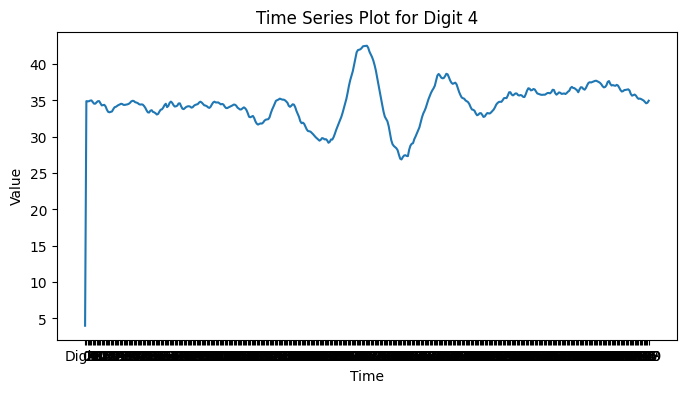

In [ ]:

plt.figure(figsize=(8, 4))
plt.plot(time_series_data)
plt.title(f"Time Series Plot for Digit {digit_1}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


(441,)


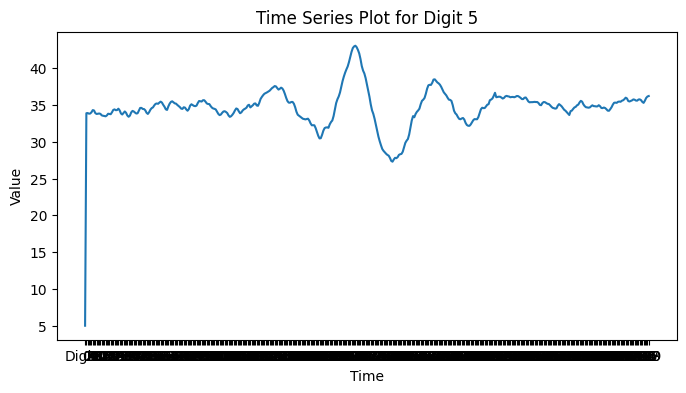

In [ ]:
time_series_data = df_digit.loc[digit_2]
print(time_series_data.shape)
time_series_data = time_series_data.astype(float)

plt.figure(figsize=(8, 4))
plt.plot(time_series_data)
plt.title(f"Time Series Plot for Digit {digit_2}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


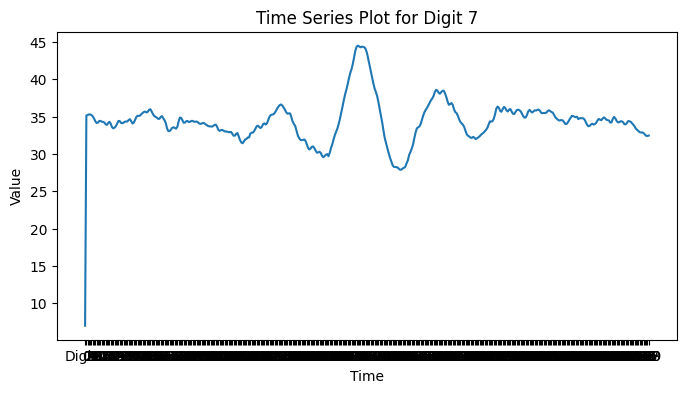

In [ ]:
time_series_data = df_digit.loc[digit_3]

time_series_data = time_series_data.astype(float)


plt.figure(figsize=(8, 4))
plt.plot(time_series_data)
plt.title(f"Time Series Plot for Digit {digit_3}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


In [ ]:
import numpy as np
data = new_df.values

In [ ]:
from sklearn.mixture import GaussianMixture

num_digits = 10
num_timesteps = 440
gmms = []

for digit_data in data:
    gmm = GaussianMixture(n_components=5, covariance_type='full')
    gmm.fit(digit_data.reshape(-1, 1))
    gmms.append(gmm)
def combine_time_series(digit1, digit2, digit3):
    sample1 = gmms[digit1].sample(num_timesteps)[0].reshape(-1)
    sample2 = gmms[digit2].sample(num_timesteps)[0].reshape(-1)
    sample3 = gmms[digit3].sample(num_timesteps)[0].reshape(-1)
    combined_sample = np.concatenate((sample1, sample2, sample3))
    return combined_sample

combined_time_series = combine_time_series(digit_1, digit_2, digit_3)
print(combined_time_series.shape)

(1320,)


In [ ]:
print(combined_time_series)

[30.57379775 29.82069874 30.4353745  ... 28.89244528 28.87650038
 30.40644501]


In [ ]:
combined_sequence = combined_time_series.astype(float)

combined_sequence_normalized = (combined_sequence - np.min(combined_sequence)) / (np.max(combined_sequence) - np.min(combined_sequence))

In [ ]:
import numpy as np
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, UpSampling1D, Input
from tensorflow.keras.models import Model

input_layer = Input(shape=(combined_sequence_normalized.shape[0], 1))

encoder_lstm = LSTM(64, activation='relu', return_sequences=True)(input_layer)

conv1d_1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(encoder_lstm)
maxpooling_1 = MaxPooling1D(pool_size=2, padding='same')(conv1d_1)
conv1d_2 = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(maxpooling_1)
maxpooling_2 = MaxPooling1D(pool_size=2, padding='same')(conv1d_2)

decoder_lstm = LSTM(64, activation='relu', return_sequences=True)(maxpooling_2)

conv1d_3 = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(decoder_lstm)
upsampling_1 = UpSampling1D(size=2)(conv1d_3)
conv1d_4 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(upsampling_1)
upsampling_2 = UpSampling1D(size=2)(conv1d_4)

output_layer = Conv1D(filters=1, kernel_size=3, activation='linear', padding='same')(upsampling_2)

autoencoder_lstm_cnn = Model(inputs=input_layer, outputs=output_layer)

autoencoder_lstm_cnn.compile(optimizer='adam', loss='mean_squared_error')

autoencoder_lstm_cnn.summary()

combined_sequence_normalized_reshaped = combined_sequence_normalized.reshape(-1, 1)
padded_input = np.pad(combined_sequence_normalized_reshaped, ((0, 1320 - len(combined_sequence_normalized_reshaped)), (0, 0)), mode='constant')

target_sequence = np.concatenate([combined_sequence_normalized_reshaped, np.zeros((1320 - len(combined_sequence_normalized_reshaped), 1))])

target_data = target_sequence.reshape(1, -1, 1)


autoencoder_lstm_cnn.fit(padded_input.reshape(1, -1, 1), target_data, epochs=50, batch_size=1, verbose=1)


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1320, 1)]         0         
                                                                 
 lstm_8 (LSTM)               (None, 1320, 64)          16896     
                                                                 
 conv1d_20 (Conv1D)          (None, 1320, 32)          6176      
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 660, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 660, 16)           1552      
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 330, 16)           0         
 g1D)                                                      

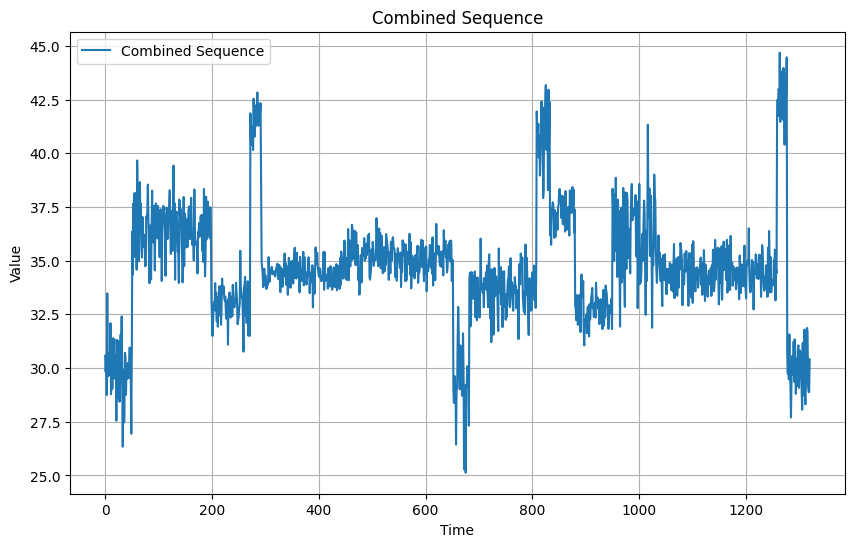

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_sequence, label="Combined Sequence")
plt.title("Combined Sequence")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


1/1 [==============================] - 2s 2s/step


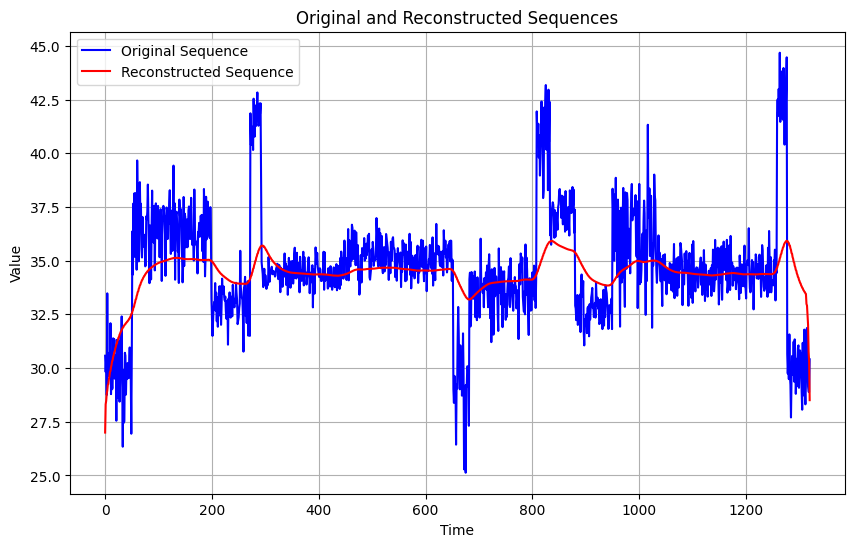

In [ ]:
import matplotlib.pyplot as plt

reconstructed_sequence_normalized_lstm_cnn = autoencoder_lstm_cnn.predict(combined_sequence_normalized_reshaped.reshape(1, -1, 1))

reconstructed_sequence_lstm_cnn = (reconstructed_sequence_normalized_lstm_cnn *
                                   (np.max(combined_sequence) - np.min(combined_sequence)) +
                                   np.min(combined_sequence))
plt.figure(figsize=(10, 6))
plt.plot(combined_sequence, label='Original Sequence', color='blue')
plt.plot(reconstructed_sequence_lstm_cnn.flatten(), label='Reconstructed Sequence', color='red')
plt.title('Original and Reconstructed Sequences')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

input_data = combined_sequence_normalized_reshaped.reshape(1, -1, 1)
reconstructed_data = autoencoder_lstm_cnn.predict(input_data)

reconstructed_data_trimmed = reconstructed_data[:, :1323, :]

mse_score = mean_squared_error(input_data.flatten(), reconstructed_data_trimmed.flatten())
mae_score = mean_absolute_error(input_data.flatten(), reconstructed_data_trimmed.flatten())

print("Mean Squared Error (MSE):", mse_score)
print("Mean Absolute Error (MAE):", mae_score)


1/1 [==============================] - 0s 294ms/step
Mean Squared Error (MSE): 0.013439136143761918
Mean Absolute Error (MAE): 0.07745949082555335
